# **Basketball Analytics Program**
## Programming, Algorithms, and Data Structures Exam Project

Name: Daniel Freyr Pàlsson

Studentnumber: 153859

Date: 20/12/2024

This Jupyter Notebook file consists of the code regarding the implementation of a Basketball Analytics System.

The Program is made for the average person, and should allow for an understanding of 4 different advanced statistics. This Being:

*   Player Efficiency Rating (PER)
*   True Shooting Procentage (TS%)
*   Effective Field Goal Procentage (EFG)
*   Usage Rate

The Program has been made via learnings from the course: *Programming, Algorithms, and Data Structures.* These learnings are centered around Object Oriented Programming (OOP), Algorithm Analysis and Data Handling.
Therefor the program will be including these different kind of coding aspects.




Importing the neccesasary libraries:

In [2]:
#All the imports we need for the program.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For NBA-API
!pip install nba_api
from nba_api.stats.endpoints import playercareerstats, commonplayerinfo
from nba_api.stats.static import players
from nba_api.stats.static import players as nba_players


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.4/279.4 kB 4.3 MB/s eta 0:00:00


##Overview of the different Classes

Following an Object Oriented approach. The following classes are implemented:

*   Player: Has to hold all the different attributes that a player has.
*   AdvancedStatsCalculations: Includes the different methods to calculate the advanced stats.
*   PlayerManagement: The management of all the different kinds of data. Handles displays and integrates with an external NBA API.

##Player Class

In [3]:
class Player:
    def __init__(self, name, points=0, assists=0, rebounds=0, steals=0, blocks=0, turnovers=0,
                 field_goals_attempted=0, free_throws_attempted=0, field_goals_made=0,
                 free_throws_made=0, minutes_played=0, games_played=0):
        self.name = name
        self.points = points
        self.assists = assists
        self.rebounds = rebounds
        self.steals = steals
        self.blocks = blocks
        self.turnovers = turnovers
        self.field_goals_attempted = field_goals_attempted
        self.free_throws_attempted = free_throws_attempted
        self.field_goals_made = field_goals_made
        self.free_throws_made = free_throws_made
        self.minutes_played = minutes_played
        self.games_played = games_played
        self.advanced_stats_calculated = False
        self.usage_rate = None
        self.player_efficiency_rating = None
        self.true_shooting_percentage = None
        self.effective_field_goal_percentage = None


 #---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

  # Method to add a players stats
    def add_stats(self, points, assists, rebounds, steals, blocks, turnovers, minutes_played, field_goals_attempted, field_goals_made, free_throws_attempted, free_throws_made, games_played=1):
        self.points = points
        self.assists = assists
        self.rebounds = rebounds
        self.steals = steals
        self.blocks = blocks
        self.turnovers = turnovers
        self.minutes_played = minutes_played
        self.field_goals_attempted = field_goals_attempted
        self.field_goals_made = field_goals_made
        self.free_throws_attempted = free_throws_attempted
        self.free_throws_made = free_throws_made
        self.games_played += games_played
        self.advanced_stats_calculated = False


    def __repr__(self):
        return f"{self.name} - PER: {self.player_efficiency_rating}"



##CalculateAdvancedStats Class

In [4]:
class CalculateAdvancedStats:

  #Method 1 - Calculate Effective Field Goal Procentage (EFG)
    def calculate_effective_field_goal_percentage(self):

        if self.field_goals_attempted > 0:
            #EFG Equation. We are *.39 since that is the percentage of field goals that are three pointers.
            efg_percentage = (self.field_goals_made + 0.5 * (self.field_goals_made * 0.39 )) / self.field_goals_attempted
        else:
            efg_percentage = 0.0  # If there is'nt any attemps the EFG should be 0

        return efg_percentage * 100  # We want to return as a percentage.

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

  #Method 2 - Calculate the Usage Rate (Calculation is simplified to lack of data)
  #Equation based on the average team possesions per game, which was found to be = 100.

    def calculate_usage_rate(self):
        # Average team possessions per game (as a constant)
        average_team_possessions = 100

        # Usage Rate Equation
        numerator = (self.field_goals_attempted + 0.44 * self.free_throws_attempted + self.turnovers)
        denominator = (self.minutes_played / 48) * average_team_possessions

        if denominator > 0:
            self.usage_rate = (numerator / denominator) * 100  # Multiply by 100 to get the procentage.
        else:
            self.usage_rate = 0.0  # Prevent division by zero which would equal zero alligevel

        return self.usage_rate

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

  #Method 3 - Calculate the player efficienncy rating

    def calculate_per(self):
        if self.minutes_played > 0:
            fg_attempted = self.field_goals_attempted
            fg_made = self.field_goals_made
            ft_attempted = self.free_throws_attempted
            ft_made = self.free_throws_made
            turnovers = self.turnovers
            rebounds = self.rebounds
            steals = self.steals
            blocks = self.blocks

            # The per calculation equation
            per_numerator = (self.points + 0.4 * fg_made - 0.7 * fg_attempted - 0.4 * (ft_attempted - ft_made)
                            - turnovers + 0.7 * rebounds + 0.1 * steals + 0.1 * blocks - 0.2)

            # Normalize by minutes played
            per_per_minute = per_numerator / self.minutes_played

            # Normalize to league average , which is found to be around 15 --> 19 is implemented to fix the lack of data availible.
            self.player_efficiency_rating = (per_per_minute * 100 / 15) + 19

        else:
            self.player_efficiency_rating = 0.0  # If no minutes played, PER is gonna be 0

        return self.player_efficiency_rating

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

  #Method 4 - Calculate the True Shooting Percentage

    def calculate_true_shooting_percentage(self):
        # Total shooting attempts, including adjusted free throw attempts.
        total_attempts = self.field_goals_attempted + 0.44 * self.free_throws_attempted
        # Prevent division by zero
        if total_attempts > 0:
            ts_percentage = self.points / (2 * total_attempts)
        else:
            ts_percentage = 0.0

        return ts_percentage * 100 #Again we want it in percantage




##Player Management Class



In [5]:
class PlayerManagement:
    def __init__(self):
      # We initialize an empty list to store player data.
        self.players = []

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

  #Method 1 - Adding a Player to the Players List

    def add_player(self, player_name):
        # Add a Player instance to the players list
        self.players.append(Player(player_name))

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


    # PlayerManagement-klassen, opdateret get_player metode
    def get_player(self, player_name):
        for player in self.players:
            if player.name.lower() == player_name.lower():  # Case-insensitive sammenligning
                return player
        return None


    def add_stats(self, player_name, points, assists, rebounds, steals, blocks, turnovers, minutes_played, field_goals_attempted, field_goals_made, free_throws_attempted, free_throws_made):

        #Getting the player by their name
        player = self.get_player(player_name)

        #If the player existsb, update the basic stats and calculate the advanced stats.
        if player:
            player.add_stats(points, assists, rebounds, steals, blocks, turnovers, minutes_played, field_goals_attempted, field_goals_made, free_throws_attempted, free_throws_made)
            self.calculate_advanced_stats(player_name)

        #We print all the different stats
            print(f"Basic stats for {player.name}:")
            print(f"Points: {player.points}, Assists: {player.assists}, Rebounds: {player.rebounds}, Steals: {player.steals}, Blocks: {player.blocks}, Turnovers: {player.turnovers}, Minutes Played: {player.minutes_played}")
            print(f"Advanced stats for {player.name}:")
            print(f"Usage Rate:{player.usage_rate:.2f}%")
            print(f"PER: {player.player_efficiency_rating:.2f}")
            print(f"True Shooting Percentage: {player.true_shooting_percentage:.2f}%")
            print(f"Effective Field Goal Percentage {player.effective_field_goal_percentage:.2f}%")

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

  #Method 3 -  Calculating the advanced stats for the player

    def calculate_advanced_stats(self, player_name):
        # Get the player by their name
        player = self.get_player(player_name)

        # If the player exists, we calculate the advanced stats
        if player:
        # Calculate Usage Rate using AdvancedStatsCalculation
          player.usage_rate = CalculateAdvancedStats.calculate_usage_rate(player)

          # Calculate per
          player.player_efficiency_rating = CalculateAdvancedStats.calculate_per(player)

          # Calculate ts
          player.true_shooting_percentage = CalculateAdvancedStats.calculate_true_shooting_percentage(player)

          # Calculate efg
          player.effective_field_goal_percentage = CalculateAdvancedStats.calculate_effective_field_goal_percentage(player)

          # hvis det er regnet
          player.advanced_stats_calculated = True



#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

  #Method 4 -  Method to show the players stats

    def show_stats(self, player_name):
        #Getting the player by their name
        player = self.get_player(player_name)
        #If the player exists we wanna show their stats.
        if player:
            stats = f"Stats for {player_name}:\n"
            stats += f"Points: {player.points}\n"
            stats += f"Assists: {player.assists}\n"
            stats += f"Rebounds: {player.rebounds}\n"
            stats += f"Steals: {player.steals}\n"
            stats += f"Blocks: {player.blocks}\n"
            stats += f"Turnovers: {player.turnovers}\n"
            stats += f"Minutes Played: {player.minutes_played}\n"
            stats += f"Field Goals Attempted: {player.field_goals_attempted}\n"
            stats += f"Field Goals Made: {player.field_goals_made}\n"
            stats += f"Free Throws Attempted: {player.free_throws_attempted}\n"
            stats += f"Free Throws Made: {player.free_throws_made}\n"


            if player.advanced_stats_calculated:
                stats += f"Usage Rate: {player.usage_rate:.2f}%\n"
                stats += f"PER: {player.player_efficiency_rating:.2f}\n"
                stats += f"True Shooting Percentage: {player.true_shooting_percentage:.2f}%\n"
                stats += f"Effective Field Goal Percentage{player.effective_field_goal_percentage:.2f}%\n"

            else:
                stats += "Advanced stats not yet calculated.\n"

            print(stats)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

  #Method 5 - Converting data into Pandas Dataframe

    def to_dataframe(self):
        data = []
        for player in self.players:
            basic_stats = {
                "Name": player.name,
                "Points": player.points,
                "Assists": player.assists,
                "Rebounds": player.rebounds,
                "Steals": player.steals,
                "Blocks": player.blocks,
                "Turnovers": player.turnovers,
                "Field Goals Attempted": player.field_goals_attempted,
                "Field Goals Made": player.field_goals_made,
                "Free Throws Attempted": player.free_throws_attempted,
                "Free Throws Made": player.free_throws_made,
            }
            if player.advanced_stats_calculated:
                basic_stats["Minutes"] = player.minutes_played
                basic_stats["Usage Rate"] = round(player.usage_rate, 2)
                basic_stats["PER"] = round(player.player_efficiency_rating, 2)
                basic_stats["True Shooting Percentage"] = round(player.true_shooting_percentage, 2)
                basic_stats["Effective Field Goal Percentage"] = round(player.effective_field_goal_percentage, 2)
            else:
                basic_stats["Minutes"] = None
                basic_stats["Usage Rate"] = None
                basic_stats["PER"] = None
                basic_stats["True Shooting Percentage"] = None
                basic_stats["Effective Field Goal Percentage"] = None

            data.append(basic_stats)

        df = pd.DataFrame(data)
        print("Generated DataFrame:\n", df)
        return df


#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

  #Method 6 - Visualizing the Player stats via MatPlotLib

    def visualize_player_stats(self):
        df = self.to_dataframe()
        if df.empty:
            print("No data to visualize.")
            return


        stats_columns = [
            "Points", "Assists", "Rebounds", "Steals",
            "Blocks", "Turnovers", "Field Goals Attempted",
            "Free Throws Attempted", "Field Goals Made",
            "Free Throws Made"
        ]


        advanced_stats_columns = [
            "Minutes", "Usage Rate", "PER",
            "True Shooting %"
        ]
        stats_columns.extend([col for col in advanced_stats_columns if col in df.columns])


        df.set_index("Name")[stats_columns].plot(kind="bar", figsize=(12, 7))
        plt.title("Player Statistics")
        plt.xlabel("Player")
        plt.ylabel("Stats")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

  #Method 7 - Visualizing the Player stats with Seaborn

    def visualize_player_stats_seaborn(self):
        df = self.to_dataframe()
        if df.empty:
            print("No available data to visualize.")
            return

        stats_columns = ["Usage Rate", "PER"]
        if not all(col in df.columns for col in stats_columns):
            print("Not all advanced stats are available.")
            return


        plt.figure(figsize=(14, 8))
        line_plot = sns.lineplot(
            data=df,
            x="Usage Rate",
            y="PER",
            hue="Name",
            style="Name",
            palette="Set2",
            linewidth=2,
            markers=True,
            markersize=12,
            dashes=False
        )

        # plot edits
        plt.title("Player Stats: PER vs Usage Rate", fontsize=18, fontweight='bold', pad=20)
        plt.xlabel("Usage Rate (%)", fontsize=14)
        plt.ylabel("Player Efficiency Rating (PER)", fontsize=14)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(True, linestyle="--", alpha=0.5)
        plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)


        plt.tight_layout()

        plt.show()


#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

  #Method 8 - Method to fetch player data from the NBA API.

    def fetch_player_data(self, player_name):

        #We fetch data via an NBA players namme

        player_info = nba_players.find_players_by_full_name(player_name)
        if not player_info:
            print(f"Player {player_name} not found in NBA database.")
            return None


        player_id = player_info[0]['id']
        career_stats = playercareerstats.PlayerCareerStats(player_id=player_id)
        common_info = commonplayerinfo.CommonPlayerInfo(player_id=player_id)


        stats = career_stats.get_data_frames()[0]
        info = common_info.get_data_frames()[0]

        return stats, info

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

  #Method 9 - Method that adds stats via the NBA API

    def add_stats_from_api(self, player_name):
        data = self.fetch_player_data(player_name)
        if not data:
            return

        stats, info = data
        player = next((p for p in self.players if p.name == player_name), None)

        if not player:
            print(f"Player {player_name} not found in the system. Adding as a new player.")
            self.add_player(player_name)

        latest_game = stats.iloc[-1]


        self.add_stats(
            player_name,
            points=int(latest_game["PTS"]),
            assists=int(latest_game["AST"]),
            rebounds=int(latest_game["REB"]),
            steals=int(latest_game["STL"]),
            blocks=int(latest_game["BLK"]),
            turnovers=int(latest_game["TOV"]),
            minutes_played=int(latest_game["MIN"]),
            field_goals_attempted=int(latest_game["FGA"]),
            field_goals_made=int(latest_game["FGM"]),
            free_throws_attempted=int(latest_game["FTA"]),
            free_throws_made=int(latest_game["FTM"]),
        )

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

  #Method 10 - Method for algo

    def print_players(self):
          if not self.players:
            print("No players found.")
          else:
            print("List of players:")
            for player in self.players:
                print(f"Player: {player.name}")

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

  #Method 11 - Method for saving to csv

    def save_to_csv(self, filename="player_stats.csv"):
           df = self.to_dataframe()
           df.to_csv(filename, index=False)
           print(f"Player stats saved to {filename}")


#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

  #Method 11 - Method for loading csv


    def load_from_csv(self, filename="player_stats.csv"):
        try:
            df = pd.read_csv(filename)
            for index, row in df.iterrows():
                player_name = row['Name']

                player = Player(player_name, points=row['Points'], assists=row['Assists'], rebounds=row['Rebounds'] ,steals=row['Steals'], blocks=row['Blocks'], turnovers=row['Turnovers'], minutes_played=row['Minutes'] ,field_goals_attempted=row['Field Goals Attempted'] ,field_goals_made=row['Field Goals Made'],free_throws_attempted=row['Free Throws Attempted'], free_throws_made=row['Free Throws Made'])
                self.players.append(player)

                if 'Usage Rate' in df.columns and not pd.isnull(row['Usage Rate']):
                  player.usage_rate = row['Usage Rate']
                  player.player_efficiency_rating = row['PER']
                  player.true_shooting_percentage = row['True Shooting Percentage']
                  player.effective_field_goal_percentage = row['Effective Field Goal Percentage']
                  player.advanced_stats_calculated = True

            print(f"Player stats loaded from {filename}")
        except FileNotFoundError:
            print(f"File not found: {filename}")



##Example of use

This section of the code is made to exemplify how the program can be used to store, illustrate and calculate basketball data

Example of Use #1

We now just wanna generate 10 player stats.

Firstly we do this manually without the NBA-API:

In [6]:
insertPlayer = PlayerManagement()

insertPlayer.add_player("Lebron James")
insertPlayer.add_player("Kevin Durant")
insertPlayer.add_player("Stephen Curry")
insertPlayer.add_player("Giannis Antetokounmpo")
insertPlayer.add_player("Luka Doncic")
insertPlayer.add_player("Joel Embiid")
insertPlayer.add_player("Nikola Jokic")
insertPlayer.add_player("Jayson Tatum")
insertPlayer.add_player("Damian Lillard")
insertPlayer.add_player("Jimmy Butler")

insertPlayer.add_stats("LeBron James", 25, 8, 7, 1, 1, 3, 36, 20, 10, 8, 6)
insertPlayer.add_stats("Kevin Durant", 30, 5, 6, 1, 2, 2, 38, 18, 12, 7, 6)
insertPlayer.add_stats("Stephen Curry", 27, 6, 5, 2, 0, 3, 34, 22, 14, 5, 4)
insertPlayer.add_stats("Giannis Antetokounmpo", 32, 6, 12, 1, 2, 4, 33, 15, 10, 9, 7)
insertPlayer.add_stats("Luka Doncic", 28, 9, 8, 1, 0, 4, 35, 19, 11, 6, 5)
insertPlayer.add_stats("Joel Embiid", 33, 4, 10, 0, 3, 3, 32, 16, 9, 8, 7)
insertPlayer.add_stats("Nikola Jokic", 26, 10, 11, 1, 1, 2, 37, 14, 8, 7, 6)
insertPlayer.add_stats("Jayson Tatum", 29, 4, 7, 1, 1, 3, 35, 17, 11, 6, 5)
insertPlayer.add_stats("Damian Lillard", 31, 7, 4, 2, 0, 3, 36, 20, 13, 8, 7)
insertPlayer.add_stats("Jimmy Butler", 22, 5, 6, 2, 1, 2, 34, 14, 8, 7, 6)


Basic stats for Lebron James:
Points: 25, Assists: 8, Rebounds: 7, Steals: 1, Blocks: 1, Turnovers: 3, Minutes Played: 36
Advanced stats for Lebron James:
Usage Rate:35.36%
PER: 21.98
True Shooting Percentage: 53.15%
Effective Field Goal Percentage 59.75%
Basic stats for Kevin Durant:
Points: 30, Assists: 5, Rebounds: 6, Steals: 1, Blocks: 2, Turnovers: 2, Minutes Played: 38
Advanced stats for Kevin Durant:
Usage Rate:29.15%
PER: 23.23
True Shooting Percentage: 71.16%
Effective Field Goal Percentage 79.67%
Basic stats for Stephen Curry:
Points: 27, Assists: 6, Rebounds: 5, Steals: 2, Blocks: 0, Turnovers: 3, Minutes Played: 34
Advanced stats for Stephen Curry:
Usage Rate:38.40%
PER: 22.39
True Shooting Percentage: 55.79%
Effective Field Goal Percentage 76.05%
Basic stats for Giannis Antetokounmpo:
Points: 32, Assists: 6, Rebounds: 12, Steals: 1, Blocks: 2, Turnovers: 4, Minutes Played: 33
Advanced stats for Giannis Antetokounmpo:
Usage Rate:33.40%
PER: 24.90
True Shooting Percentage: 8

Example of use #2

We now wanna show We now wanna show how we add players via the NBA-API

Here we again use a method from the PlayerManagement Class

In [7]:
insertPlayer = PlayerManagement()

insertPlayer.add_stats_from_api("Kyrie Irving")

Player Kyrie Irving not found in the system. Adding as a new player.
Basic stats for Kyrie Irving:
Points: 573, Assists: 128, Rebounds: 113, Steals: 29, Blocks: 6, Turnovers: 52, Minutes Played: 848
Advanced stats for Kyrie Irving:
Usage Rate:28.95%
PER: 22.05
True Shooting Percentage: 62.35%
Effective Field Goal Percentage 60.17%


##Visualizing the Player Data

Next, we would like to visualize our data.

Here I've made use of the two libraries MatPlotLib and Seaborn.

MatPlotLib for the Basic Data

Seaborn for PER and Usage Rate (Advanced Stats)

In this example we again make use of the API

Player LeBron James not found in the system. Adding as a new player.
Basic stats for LeBron James:
Points: 547, Assists: 218, Rebounds: 192, Steals: 17, Blocks: 15, Turnovers: 99, Minutes Played: 840
Advanced stats for LeBron James:
Usage Rate:32.57%
PER: 21.87
True Shooting Percentage: 58.07%
Effective Field Goal Percentage 58.76%
Player Kevin Durant not found in the system. Adding as a new player.
Basic stats for Kevin Durant:
Points: 385, Assists: 55, Rebounds: 97, Steals: 9, Blocks: 20, Turnovers: 45, Minutes Played: 534
Advanced stats for Kevin Durant:
Usage Rate:31.30%
PER: 22.42
True Shooting Percentage: 63.50%
Effective Field Goal Percentage 62.01%
Player Stephen Curry not found in the system. Adding as a new player.
Basic stats for Stephen Curry:
Points: 459, Assists: 133, Rebounds: 103, Steals: 26, Blocks: 9, Turnovers: 64, Minutes Played: 618
Advanced stats for Stephen Curry:
Usage Rate:33.58%
PER: 22.18
True Shooting Percentage: 62.31%
Effective Field Goal Percentage 54.03%

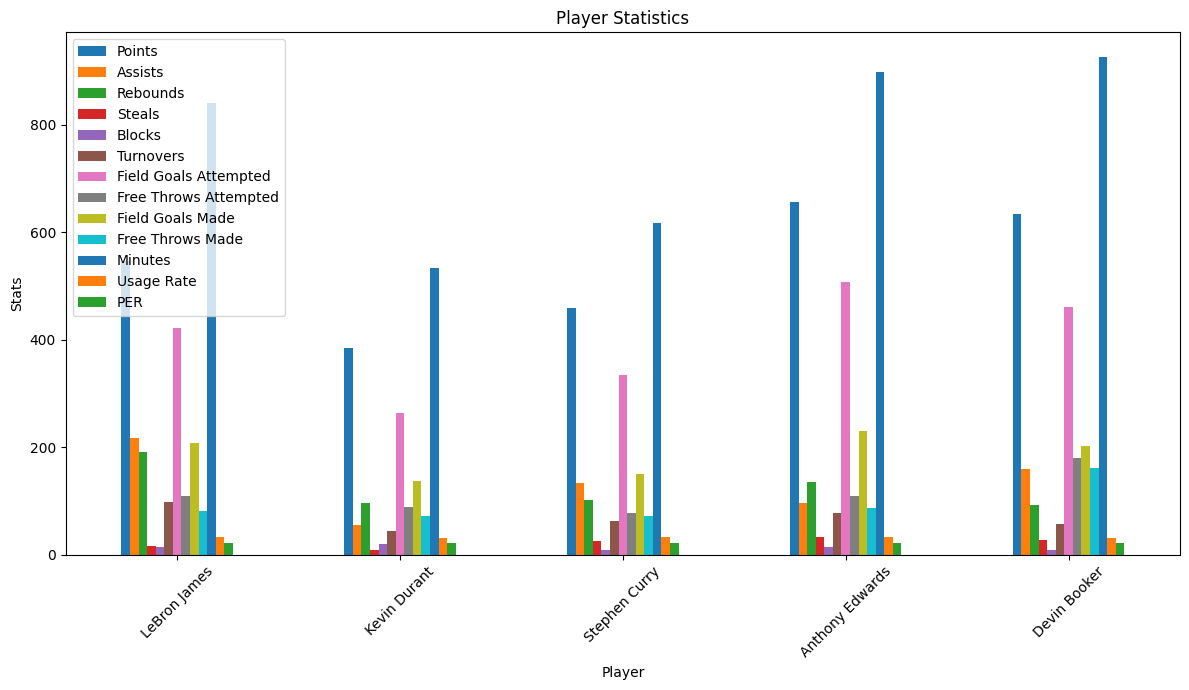

Generated DataFrame:
               Name  Points  Assists  Rebounds  Steals  Blocks  Turnovers  \
0     LeBron James     547      218       192      17      15         99   
1     Kevin Durant     385       55        97       9      20         45   
2    Stephen Curry     459      133       103      26       9         64   
3  Anthony Edwards     656       96       135      33      15         78   
4     Devin Booker     635      160        93      28       9         58   

   Field Goals Attempted  Field Goals Made  Free Throws Attempted  \
0                    423               208                    109   
1                    264               137                     89   
2                    334               151                     78   
3                    507               230                    109   
4                    462               202                    180   

   Free Throws Made  Minutes  Usage Rate    PER  True Shooting Percentage  \
0                81      840 

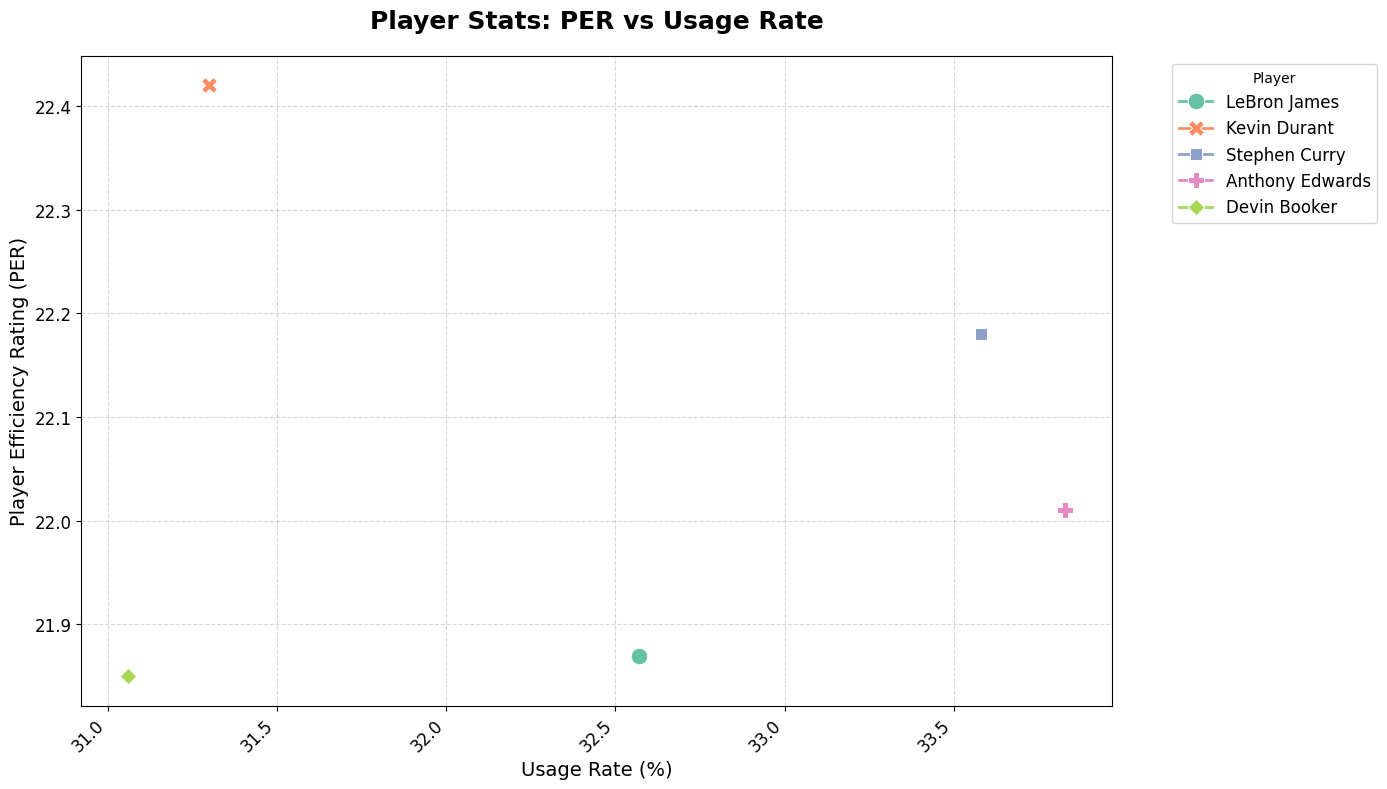

In [8]:
# Initialize the PlayerManagement instance
visualizeData = PlayerManagement()

visualizeData.add_stats_from_api("LeBron James")
visualizeData.add_stats_from_api("Kevin Durant")
visualizeData.add_stats_from_api("Stephen Curry")
visualizeData.add_stats_from_api("Anthony Edwards")
visualizeData.add_stats_from_api("Devin Booker")

#We visualize basic stats via MatPlotLib
visualizeData.visualize_player_stats()

#We use a Seaborn ScatterPlot to see advanced stats (PER AND USAGE RATE)
visualizeData.visualize_player_stats_seaborn()


#Implementing Sorting Algorithms

Since the course has also focused on different sorts of algorithms, the code will also take account for this.
Therefor we firstly have implemented two sorts of sorting algorithms.

*   Sorting Algorithm that sorts by PER (Player Efficiency Rating)
*   Sorting Algorithm that sorts by Name (Alphabetically)

In [9]:
# Bubble sort from lectures
def sort_by_name(players):
    n = len(players)
    for i in range(n):
        for j in range(0, n-i-1):
            if players[j].name > players[j+1].name:
                players[j], players[j+1] = players[j+1], players[j]
    return players

print("Players before sorting by name:")
insertPlayer.print_players()

sorted_players_by_name = sort_by_name(insertPlayer.players)

print("\nPlayers sorted by name:")
for player in sorted_players_by_name:
    print(player.name)


Players before sorting by name:
List of players:
Player: Kyrie Irving

Players sorted by name:
Kyrie Irving


In [10]:
# Bubble sort again
def sort_by_per(players):
    n = len(players)
    for i in range(n):
        for j in range(0, n-i-1):
            per_j = players[j].player_efficiency_rating
            per_j_plus_1 = players[j+1].player_efficiency_rating

            if per_j < per_j_plus_1:
                players[j], players[j+1] = players[j+1], players[j]

    return players

print("Players before sorting by PER:")
insertPlayer.print_players()
sorted_players_by_per = sort_by_per(insertPlayer.players)

print("\nPlayers sorted by PER:")
for player in sorted_players_by_per:
  print(f"{player.name}: {player.player_efficiency_rating}")


Players before sorting by PER:
List of players:
Player: Kyrie Irving

Players sorted by PER:
Kyrie Irving: 22.05424528301887


#Implementing Searching Algorithms

Another sort of Algorithms that have been introduced during the course is searching algorithms.

This includes both Linear Search (Looping through each element) & (Complexity(O(n))

And Binary search (Applies to ordered lists) & (Complexity: O(log n))

We have just chosen to search by name. You could ofcourse search for specific stats as well

In [11]:
def linear_search_player(players, name):
    for player in players:
      if str(player.name).lower() == name.lower():
            return player
    return None

    players = insertPlayer.players

    player = linear_search_player(players, "Trae Young")

    if player:
        print(f"Player found: {player.name}")
    else:
        print("Player not found.")

In [12]:
def binary_search_player(players, name):
    players.sort(key=lambda player: player.name.lower())

    low = 0
    high = len(players) - 1

    while low <= high:
        mid = (low + high) // 2
        if players[mid].name.lower() == name.lower():
            return players[mid]
        elif players[mid].name.lower() < name.lower():
            low = mid + 1
        else:
            high = mid - 1

    return None

    players = insertPlayer.players

    player = binary_search_player(players, "Trae Young")

    if player:
        print(f"Player found: {player.name}")
    else:
        print("Player not found.")

#Main Menu

The last part of the program consists of the implementation of a Menu.

The Menu was found to be essential since as it enhances the program's user-friendliness, allowing users without coding knowledge to navigate the program easily.








In [ ]:
def player_menu():

    pm = PlayerManagement()

    while True:
        print("\n" + "="*60)
        print(" " * 15 + "Basketball Analytics Program".center(30))
        print("="*60)

        print("\n1. Add Player")
        print("2. Add Stats to Player")
        print("3. Show a Single Player's Stats")
        print("4. Show All Player Stats in Database")
        print("5. Visualize Player Stats")
        print("8. Sort Players By their PER")
        print("9. Insert NBA Player and The Players Stats")
        print("10. Save Player Stats to CSV")
        print("11. Load Player Stats from CSV")
        print("12. Exit")

        print("="*60)
        choice = input("Enter your choice: ").strip()

        if choice == "1":
            player_name = input("Enter player name: ").strip()
            pm.add_player(player_name)

        elif choice == "2":

            player_name = input("Enter player name: ").strip()
            points = int(input("Points: ").strip())
            assists = int(input("Assists: ").strip())
            rebounds = int(input("Rebounds: ").strip())
            steals = int(input("Steals: ").strip())
            blocks = int(input("Blocks: ").strip())
            turnovers = int(input("Turnovers: ").strip())
            minutes_played = int(input("Minutes Played: ").strip())
            field_goals_attempted = int(input("Field Goals Attempted: ").strip())
            field_goals_made = int(input("Field Goals Made: ").strip())
            free_throws_attempted = int(input("Free Throws Attempted: ").strip())
            free_throws_made = int(input("Free Throws Made: ").strip())

            pm.add_stats(player_name, points, assists, rebounds, steals, blocks, turnovers, minutes_played, field_goals_attempted, field_goals_made, free_throws_attempted, free_throws_made)

        elif choice == "3":
            player_name = input("Enter player name: ").strip()
            pm.show_stats(player_name)

        elif choice == "4":
            df = pm.to_dataframe()
            print(df)

        elif choice == "5":
            pm.visualize_player_stats()
            pm.visualize_player_stats_seaborn()

        elif choice == "6":
            team_name = input("Enter team name: ").strip()
            pm.create_team(team_name)

        elif choice == "7":
            player_name = input("Enter player name: ").strip()
            team_name = input("Enter team name: ").strip()
            pm.add_player_to_team(player_name, team_name)

        elif choice == "8":
            pm.players = sort_by_per(pm.players) # Call sort_by_per
            print("Players sorted by PER.")

        elif choice == "9":
            player_name = input("Enter player name: ").strip()
            pm.add_stats_from_api(player_name)

        elif choice == "10":
            filename = input("Enter filename for CSV (e.g., player_stats.csv): ")
            pm.save_to_csv(filename)

        elif choice == "11":
            filename = input("Enter filename for CSV (e.g., player_stats.csv): ")
            pm.load_from_csv(filename)

        elif choice == "12":
            print("Exiting...")
            break

        else:
            print("Invalid choice. Please select a valid option.")



if __name__ == "__main__":
    player_menu()



                Basketball Analytics Program 

1. Add Player
2. Add Stats to Player
3. Show a Single Player's Stats
4. Show All Player Stats in Database
5. Visualize Player Stats
8. Sort Players By their PER
9. Insert NBA Player and The Players Stats
10. Save Player Stats to CSV
11. Load Player Stats from CSV
12. Exit
